In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

spark = SparkSession.builder \
.master("spark://10.130.10.80:7077") \
.appName("Project_main") \
.getOrCreate()

In [2]:
pwd

'/mnt/project-cluster-group22-pvc'

In [3]:
# lam_data_ppohjanmaa.csv has data from 4 different LAM points
df = spark.read.csv("/mnt/project-cluster-group22-pvc/lam_data_ppohjanmaa.csv", header=True, inferSchema=True, sep=";")

In [4]:
df.show(vertical=True)

-RECORD 0--------------
 lam_point_id | 1052   
 year         | 20     
 day          | 1      
 hour         | 0      
 minute       | 0      
 second       | 22     
 100th_second | 99     
 length       | 3.8    
 lane         | 2      
 direction    | 2      
 category     | 1      
 speed        | 87     
 faulty       | 0      
 total_time   | 2299   
 interval     | -2     
 queue_start  | 0      
-RECORD 1--------------
 lam_point_id | 1052   
 year         | 20     
 day          | 1      
 hour         | 0      
 minute       | 0      
 second       | 56     
 100th_second | 99     
 length       | 4.4    
 lane         | 1      
 direction    | 1      
 category     | 1      
 speed        | 75     
 faulty       | 0      
 total_time   | 5699   
 interval     | -2     
 queue_start  | 0      
-RECORD 2--------------
 lam_point_id | 1052   
 year         | 20     
 day          | 1      
 hour         | 0      
 minute       | 2      
 second       | 35     
 100th_second | 

In [5]:
df.printSchema()

root
 |-- lam_point_id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- minute: integer (nullable = true)
 |-- second: integer (nullable = true)
 |-- 100th_second: integer (nullable = true)
 |-- length: double (nullable = true)
 |-- lane: integer (nullable = true)
 |-- direction: integer (nullable = true)
 |-- category: integer (nullable = true)
 |-- speed: integer (nullable = true)
 |-- faulty: integer (nullable = true)
 |-- total_time: integer (nullable = true)
 |-- interval: integer (nullable = true)
 |-- queue_start: integer (nullable = true)



In [6]:
from pyspark.sql import functions as F
df.select(F.col("lam_point_id"))

DataFrame[lam_point_id: int]

In [7]:
df.select("length").count()

1219128

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
dff = df.toPandas()

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Amount of vehicles')

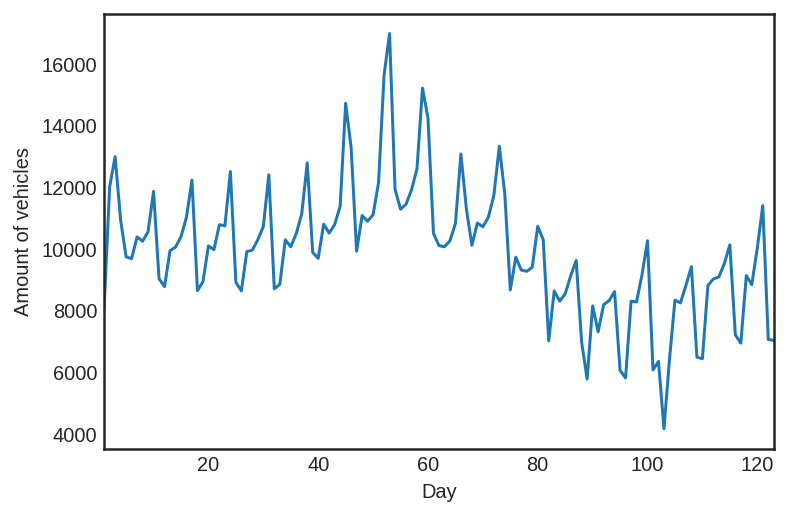

In [9]:
ax = dff['day'].value_counts().sort_index().plot(kind='line')
ax.set_xlabel("Day")
ax.set_ylabel("Amount of vehicles")

In [10]:
# for testing, do not use
#fig, ax = plt.subplots()
#test = dff.groupby('lam_point_id')['day'].value_counts()
#print(test)
#
#dff.groupby('lam_point_id')['day'].value_counts().sort_index().plot(kind='line',x='day', ax=ax)